Gender Prediction from [Open CV](https://learnopencv.com/age-gender-classification-using-opencv-deep-learning-c-python/) based on the Adience dataset that was used in the gender shades paper

In [62]:
import cv2

In [63]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

In [64]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!rm shape_predictor_68_face_landmarks.dat.bz2

--2021-12-16 02:20:27--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  9.03MB/s    in 8.5s    

2021-12-16 02:20:36 (7.15 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [65]:
!wget -O gender_deploy.prototxt https://github.com/spmallick/learnopencv/blob/master/AgeGender/gender_deploy.prototxt?raw=true

--2021-12-16 02:20:36--  https://github.com/spmallick/learnopencv/blob/master/AgeGender/gender_deploy.prototxt?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/spmallick/learnopencv/raw/master/AgeGender/gender_deploy.prototxt [following]
--2021-12-16 02:20:36--  https://github.com/spmallick/learnopencv/raw/master/AgeGender/gender_deploy.prototxt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/spmallick/learnopencv/master/AgeGender/gender_deploy.prototxt [following]
--2021-12-16 02:20:36--  https://raw.githubusercontent.com/spmallick/learnopencv/master/AgeGender/gender_deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent

In [66]:
!wget -O gender_net.caffemodel https://github.com/eveningglow/age-and-gender-classification/blob/master/model/gender_net.caffemodel?raw=true

--2021-12-16 02:20:36--  https://github.com/eveningglow/age-and-gender-classification/blob/master/model/gender_net.caffemodel?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/eveningglow/age-and-gender-classification/raw/master/model/gender_net.caffemodel [following]
--2021-12-16 02:20:37--  https://github.com/eveningglow/age-and-gender-classification/raw/master/model/gender_net.caffemodel
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eveningglow/age-and-gender-classification/master/model/gender_net.caffemodel [following]
--2021-12-16 02:20:37--  https://raw.githubusercontent.com/eveningglow/age-and-gender-classification/master/model/gender_net.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133

In [67]:
!wget -O deploy_gender.prototxt https://github.com/spiorf/deepdream/blob/master/models/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt?raw=true

--2021-12-16 02:20:37--  https://github.com/spiorf/deepdream/blob/master/models/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/spiorf/deepdream/raw/master/models/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt [following]
--2021-12-16 02:20:37--  https://github.com/spiorf/deepdream/raw/master/models/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/spiorf/deepdream/master/models/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt [following]
--2021-12-16 02:20:37--  https://raw.githubusercontent.com/spiorf/deepdream/master/models/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt
Resolving ra

In [68]:
# Load gender prediction model
# The gender model architecture
# https://drive.google.com/open?id=1W_moLzMlGiELyPxWiYQJ9KFaXroQ_NFQ
GENDER_MODEL = 'deploy_gender.prototxt'
# The gender model pre-trained weights
# https://drive.google.com/open?id=1AW3WduLk1haTVAxHOkVS_BEzel1WXQHP
GENDER_PROTO = 'gender_net.caffemodel'
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
gender_net = cv2.dnn.readNetFromCaffe(GENDER_MODEL, GENDER_PROTO)

genderList = ['Male', 'Female']

In [69]:
i = cv2.imread("./origs/1-3.png")

In [70]:
def detect_gender(i):
  blob = cv2.dnn.blobFromImage(i, 1, (256, 256), MODEL_MEAN_VALUES, swapRB=False)
  gender_net.setInput(blob)
  genderPreds = gender_net.forward()
  gender = genderList[genderPreds[0].argmax()]
  return gender

gender pipeline

In [ ]:
import pandas as pd
import os

test_file = "./test4"
inner_files = os.listdir(test_file)
for i_f in inner_files:
  print(i_f)
  if i_f == "ipynb_checkpoints":
    continue
  path = test_file+"/"+i_f
  pics = os.listdir(path)
  results = []
  total = len(pics)
  acc = 0
  for pic in pics:
    if pic == ".ipynb_checkpoints":
      continue
    p_path = path+"/"+pic
    img = cv2.imread(p_path)
    output = detect_gender(img)
    label = int(pic.split("-")[0])
    if label//2 == 0 and output == "Female":
      acc += 1
    elif label//2 == 1 and output == "Male":
      acc += 1
    results.append([pic,output])

  print("results",results)
  print("accuracy:", acc/total)

Skin Color Matching

In [ ]:
# face detector
!wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [72]:
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd 
from scipy.spatial import distance
from PIL import Image

In [73]:
classifier = face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [91]:
def crop_face(i):
  bboxes = classifier.detectMultiScale(i)
  # making data frame 
  df = pd.DataFrame(bboxes)
  print(df)
  # Returns index of maximum weight
  idx = df[3].idxmax()

  x, y, width, height = bboxes[idx]
  x2, y2 = x + width, y + height

  cropped = i[y:y2,x:x2,:]
  return cropped

In [75]:
def color_avg(img):
  return np.average(img, axis = (0,1))

In [76]:
def get_dist(vec1, vec2):
  dst = distance.euclidean(vec1, vec2)
  return dst

In [77]:
from functools import partial

BLACK_THRESHOLD = 40
WHITE_THRESHOLD = 80

def my_skin_detect(src: np.ndarray, threshold: int) -> np.ndarray:
  mask = np.logical_and.reduce((src[:, :, 2] < 150, src[:, : ,1] < threshold))
  L = src[:,:,:3]
  L[mask] = 0
  img_new = cv2.merge([L])    
  return img_new
  
my_skin_detect_black = partial(my_skin_detect, threshold=BLACK_THRESHOLD)
my_skin_detect_white = partial(my_skin_detect, threshold=WHITE_THRESHOLD)

"""
def my_skin_detect_black(src):
 
    dst = np.zeros(np.shape(src)[:-1], dtype= np.uint8)
    mask = np.logical_and.reduce((src[:,:,2]<150, src[:,:,1]<40))

    l1 = src[:,:,0]
    l1[mask] = 0
    l2 = src[:,:,1]
    l2[mask] = 0
    l3 = src[:,:,2]
    l3[mask] = 0

    img_new = cv2.merge([l1, l2, l3])
    return img_new

def my_skin_detect_white(src):
 
    dst = np.zeros(np.shape(src)[:-1], dtype= np.uint8)
    mask = np.logical_and.reduce((src[:,:,2]<150, src[:,:,1]<80))

    l1 = src[:,:,0]
    l1[mask] = 0
    l2 = src[:,:,1]
    l2[mask] = 0
    l3 = src[:,:,2]
    l3[mask] = 0

    img_new = cv2.merge([l1, l2, l3])
    return img_new
""";

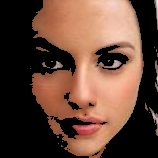

Average color: [54.23065214 68.66511777 99.62866528]


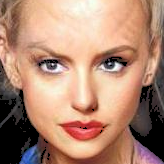

Average color: [114.88912849 136.01829268 176.95597858]
Distance between the two:  119.14451018772569


In [78]:
i = cv2.imread("0-2.jpg")
cropped = crop_face(i)
img = my_skin_detect_white(cropped)
cv2_imshow(img)
vec1 = color_avg(img)
print("Average color:", vec1)

i2 = cv2.imread("2-2.jpg")
cropped2 = crop_face(i2)
img2 = my_skin_detect_black(cropped2)
cv2_imshow(img2)
vec2 = color_avg(img2)
print("Average color:", vec2)

print("Distance between the two: ",get_dist(vec1, vec2))

Full Skin Pipeline:
- Read in the image
- Crop and segment the skin
- Zoom in on cheek & get pixel average
- Return distance from reference
- Sum the distance as an error

In [97]:
import os

def skin_pipeline(test):
  cust_path = test + "/cust/"
  orig_path = test + "/orig/"
  refs = prep_refs(test)

  cust_files = os.listdir(cust_path)
  orig_files = os.listdir(orig_path)

  # hold the results somewhere
  cust_results = {0:0, 1:0, 2:0, 3:0}
  orig_results = {0:0, 1:0, 2:0, 3:0}

  # go through the cutsom GAN images
  for fil in cust_files:
    path = cust_path + fil 
    img = cv2.imread(path)
    skinned = img
    cropped = crop_face(img)
    label = int(fil.split("-")[0])

    if label < 2:
      skinned = my_skin_detect_black(cropped)
      avg_arr = zoom_in(skinned)
      # get the difference between this image's 
      # skin and the reference skin
      dist = get_dist(avg_arr, refs[label])
      cust_results[label] = cust_results[label] + dist
    else:
      skinned = my_skin_detect_white(cropped)
      avg_arr = zoom_in(skinned)
      # get the difference between this image's 
      # skin and the reference skin
      dist = get_dist(avg_arr, refs[label])
      cust_results[label] = cust_results[label] + dist



  # go through the original GAN images
  for fil in orig_files:
    path = orig_path + fil 
    img = cv2.imread(path)
    skinned = img
    cropped = crop_face(img)
    label = int(fil.split("-")[0])

    if label < 2:
      skinned = my_skin_detect_black(cropped)
      avg_arr = zoom_in(skinned)
      # get the difference between this image's 
      # skin and the reference skin
      dist = get_dist(avg_arr, refs[label])
      orig_results[label] = orig_results[label] + dist
    else:
      skinned = my_skin_detect_white(cropped)
      avg_arr = zoom_in(skinned)
      # get the difference between this image's 
      # skin and the reference skin
      dist = get_dist(avg_arr, refs[label])
      orig_results[label] = orig_results[label] + dist


In [95]:
def prep_refs(test):
  ref_path = test+"/refs/"
  holders = np.array([0,0,0,0], dtype=object)
  refs = os.listdir(ref_path)
  for fil in refs:
    rpath = ref_path+fil 
    r_img = cv2.imread(rpath)
    cropped = crop_face(r_img)
    label = int(fil.split(".")[0])
    print("label", label)

    if label < 2:
      print("in here...")
      skinned = my_skin_detect_black(cropped)
      avg_arr = zoom_in(skinned)
      holders[label] = np.array(avg_arr)
    else:
      print("not here...")
      skinned = my_skin_detect_white(cropped)
      avg_arr = zoom_in(skinned)
      holders[label] = np.array(avg_arr)


  return holders

In [88]:
# lists
# The name convention: The GAN model and the domain of the reference
orig_0 = []
orig_1 = []
orig_2 = []
orig_3 = []

cust_0 = []
cust_1 = []
cust_2 = []
cust_3 = []

In [96]:
def zoom_in(img):
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = detector(gray)

  for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()

  annotations = []
  landmarks = predictor(gray, face)
  annotations.append([(landmarks.part(n).x, landmarks.part(n).y) for n in range(0,68)])
  # get the crop coordinates
  y2 = annotations[0][2][1]
  y1 = annotations[0][1][1] 
  x2 = annotations[0][31][0]
  x1 =  annotations[0][3][0] 

  # crop the different color channels
  b_crop = img[:,:,0]
  b_crop = b_crop[y1:y2, x1:x2]
  g_crop = img[:,:,1]
  g_crop = g_crop[y1:y2, x1:x2]
  r_crop = img[:,:,2]
  r_crop = r_crop[y1:y2, x1:x2]

  # merge the color channels
  patch = cv2.merge([b_crop, g_crop, r_crop])

  cv2_imshow(patch)
  avg_skin = color_avg(patch)

  return avg_skin

In [ ]:
skin_pipeline("test1")

Makeshift Pipeline

In [143]:
import numpy as np
def makeshift(test):
  cust_path = test + "/cust/"
  orig_path = test + "/orig/"
  ref_path = test + "/refs/"

  cust_files = os.listdir(cust_path)
  orig_files = os.listdir(orig_path)
  ref_files = os.listdir(ref_path)

  cust_counts = {0:0, 1:0, 2:0, 3:0}
  orig_counts = {0:0, 1:0, 2:0, 3:0}
  # find the averages of the reference images
  ref_avg = {0:0, 1:0, 2:0, 3:0}
  for ref_fil in ref_files:
    if ref_fil == ".ipynb_checkpoints":
      continue
    lab = int(ref_fil.split(".")[0])
    path = ref_path+ref_fil
    img = cv2.imread(path)
    print("size", img.shape)
    res = color_avg(img)
    ref_avg[lab] = res

  for cus_fil in cust_files:
    if cus_fil == ".ipynb_checkpoints":
      continue
    cust_p = cust_path + cus_fil
    img = cv2.imread(cust_p)
    res_c = color_avg(img)
    label_c = int(cus_fil.split("-")[0])
    cust_counts[label_c] = cust_counts[label_c] + 1
    compare = ref_avg[label_c]
    dist = get_dist(compare, res_c)
    cust_results[label_c] += dist


  for orig_fil in orig_files:
    if orig_fil == ".ipynb_checkpoints":
      continue
    orig_p = orig_path + cus_fil
    img = cv2.imread(orig_p)
    res_c = color_avg(img)
    label_c = int(orig_fil.split("-")[0])
    orig_counts[label_c] = orig_counts[label_c] + 1
    compare = ref_avg[label_c]
    dist = get_dist(compare, res_c)
    orig_results[label_c] += dist

  for i in range(4):
    cust_results[i] = cust_results[i]/cust_counts[i]
    orig_results[i] = orig_results[i]/orig_counts[i]


In [144]:
# hold the results somewhere
cust_results = {0:0, 1:0, 2:0, 3:0}
orig_results = {0:0, 1:0, 2:0, 3:0}

In [ ]:
makeshift("get")

In [156]:
cust_results

{0: 108.1478276316022,
 1: 139.62057967461448,
 2: 120.94219822955915,
 3: 196.04461250909958}

In [157]:
orig_results

{0: 154.9959178337725,
 1: 196.3070630555415,
 2: 45.57556437365163,
 3: 32.52030181519949}

In [ ]:
import statistics

sum = 